In [2]:
df = pd.read_csv("C://Users//Administrator//Downloads//bitcoin.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [3]:
df.shape

(2713, 7)

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB


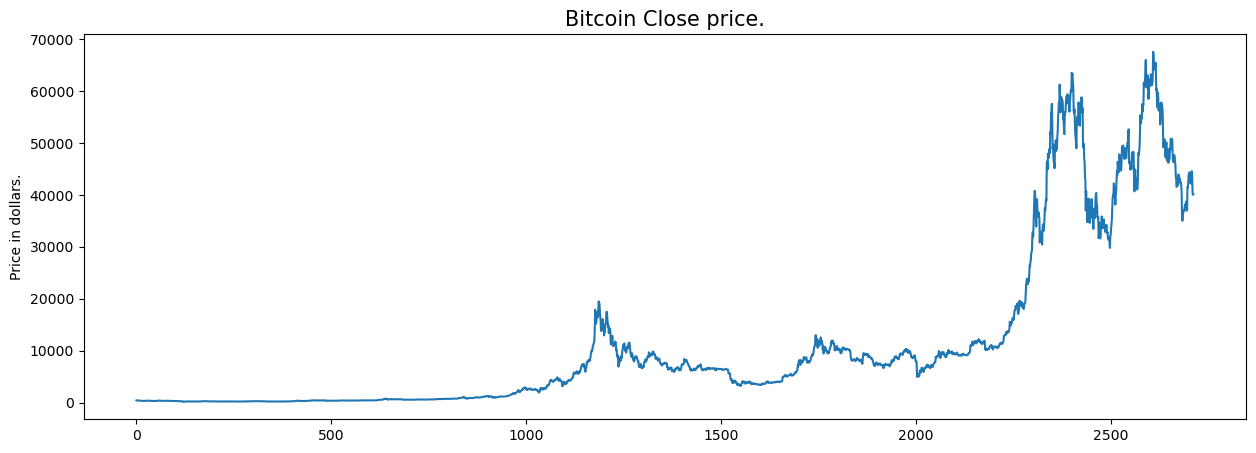

In [6]:
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [7]:
df[df['Close'] == df['Adj Close']].shape, df.shape

((2713, 7), (2713, 7))

In [8]:
df = df.drop(['Adj Close'], axis=1)

In [9]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9824\4203346974.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_9824\4203346974.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_9824\4203346974.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar 

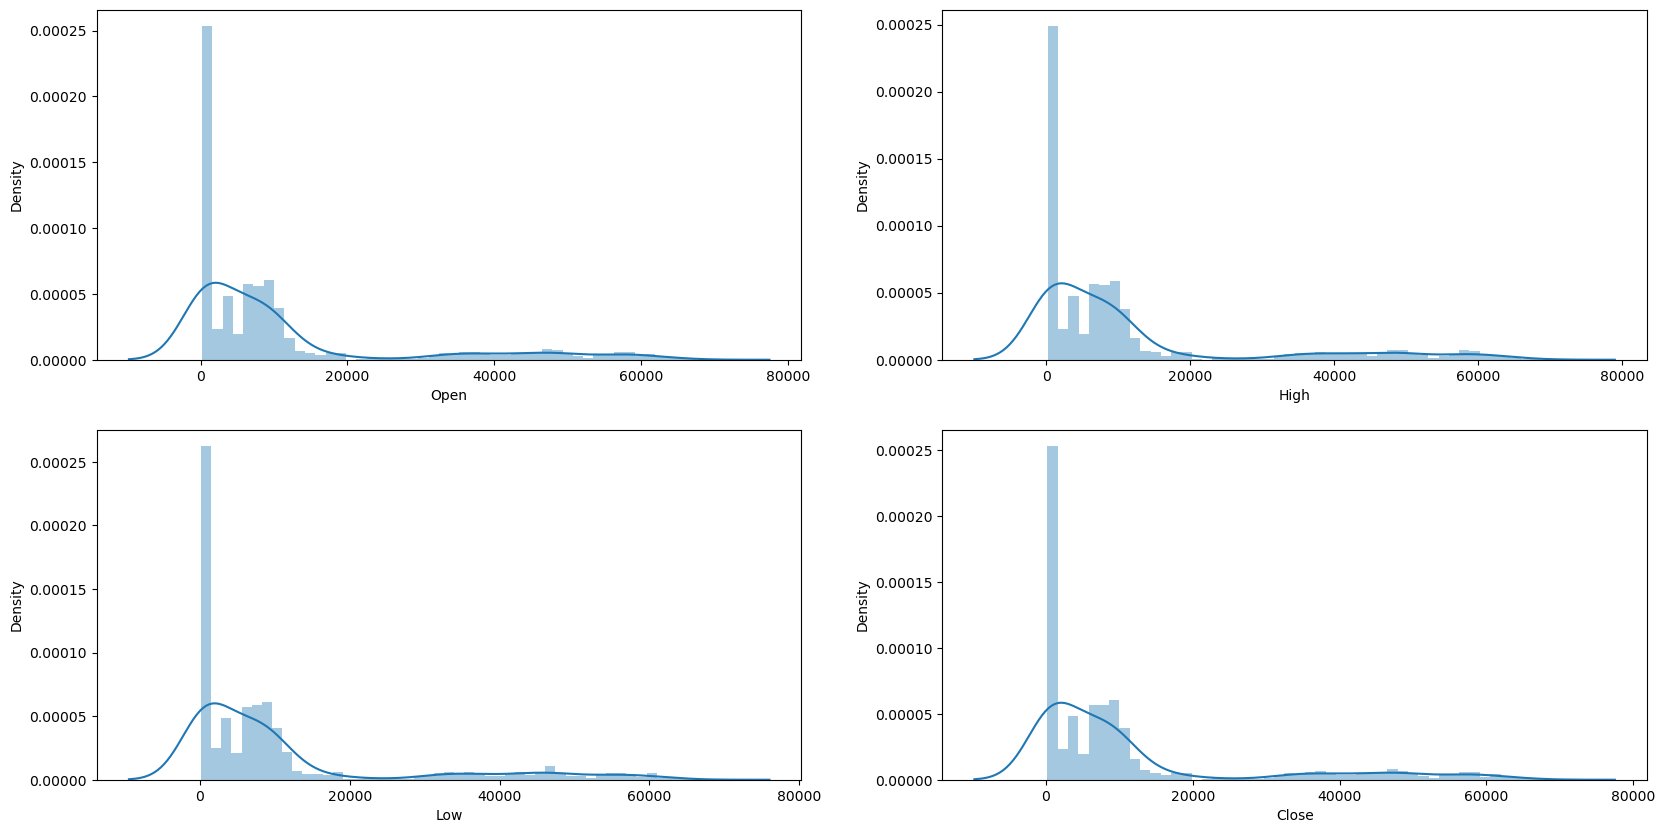

In [10]:
features = ['Open', 'High', 'Low', 'Close']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.distplot(df[col])
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9824\4063133130.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


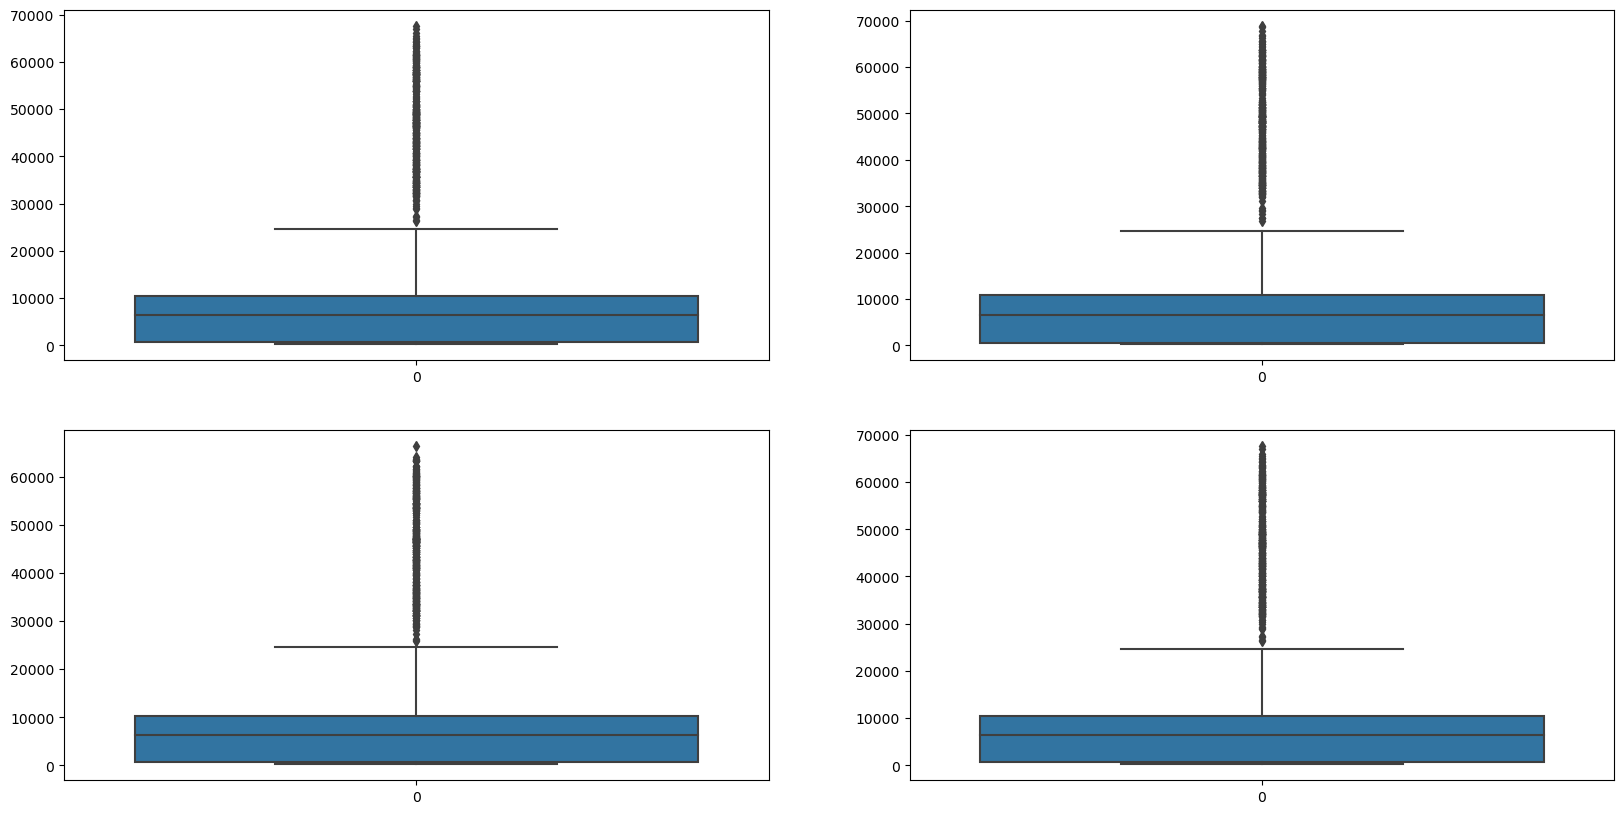

In [11]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.boxplot(df[col])
plt.show()

In [12]:
splitted = df['Date'].str.split('-', expand=True)

df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')
df['Date'] = pd.to_datetime(df['Date']) 

df.head()


,Date,Open,High,Low,Close,Volume,year,month,day
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9824\1410812455.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


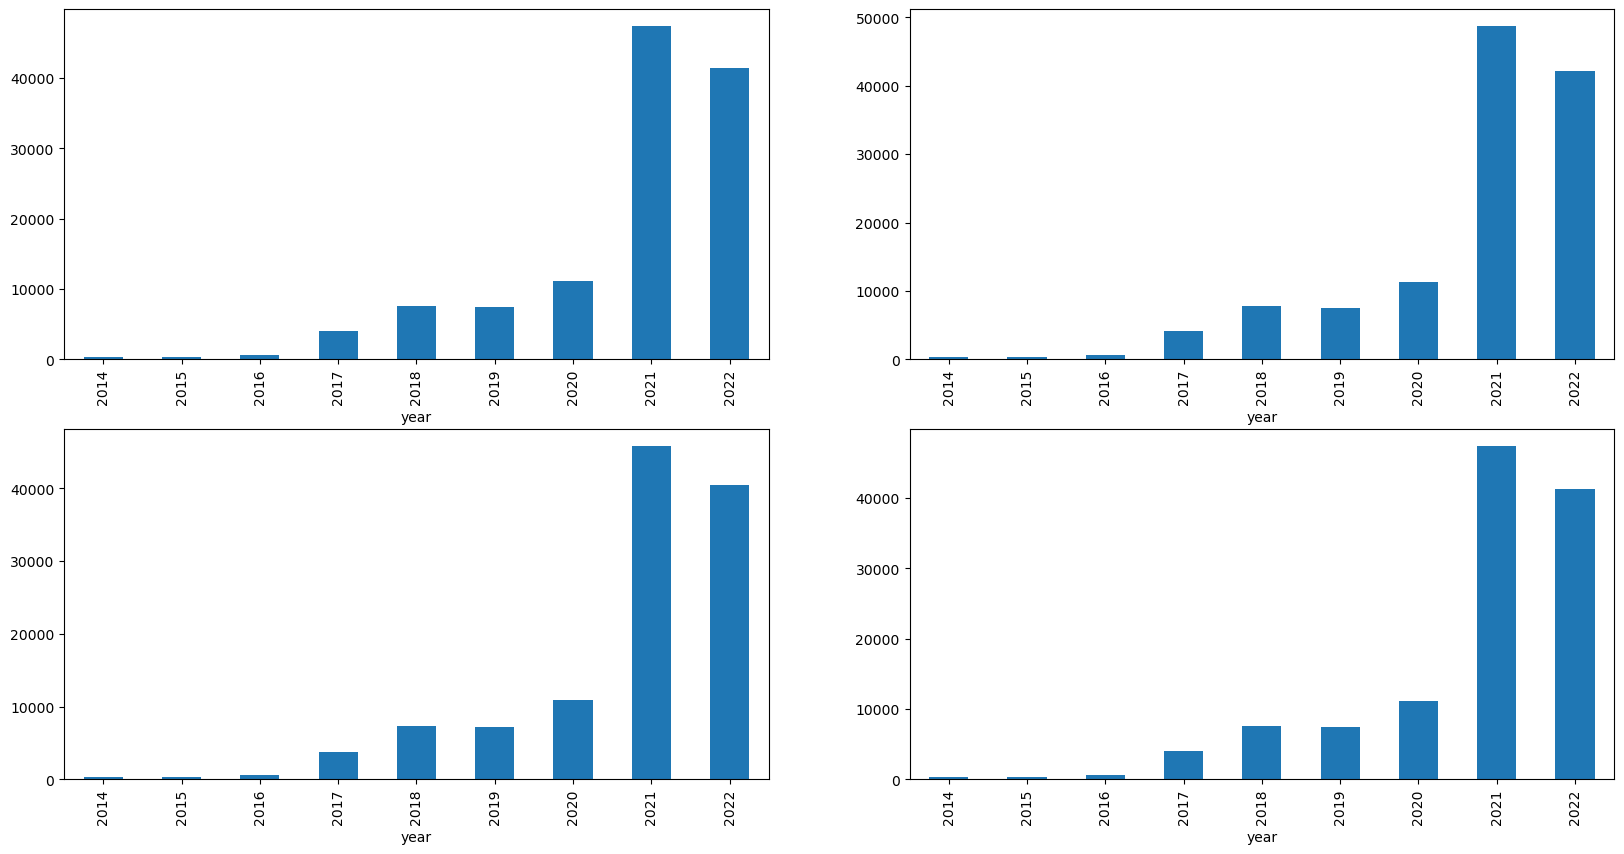

In [13]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [14]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,1
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,1


In [15]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

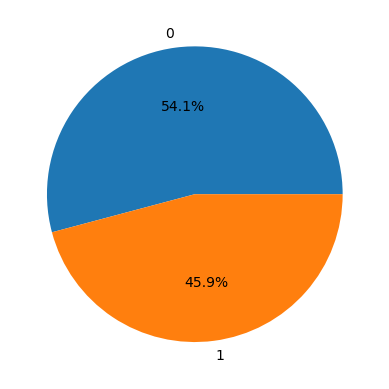

In [16]:
plt.pie(df['target'].value_counts().values, 
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

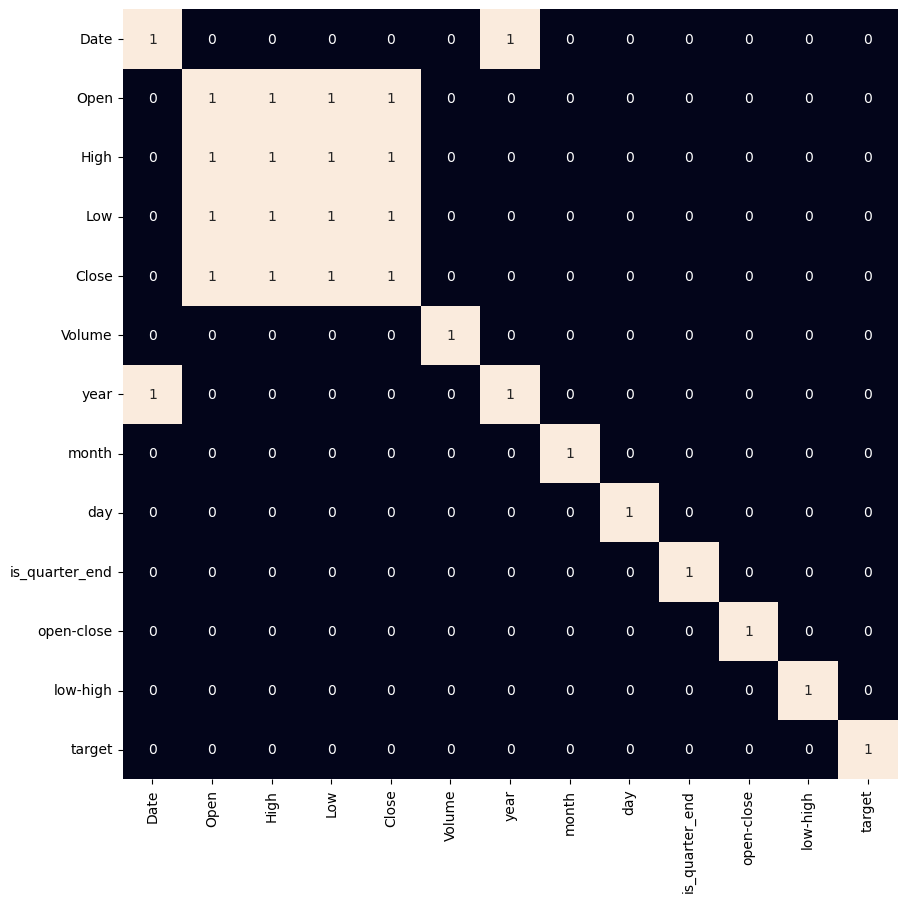

In [17]:
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0, stratify=target)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.5442260442260443
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.05      0.08       373
           1       0.54      0.97      0.70       441

    accuracy                           0.54       814
   macro avg       0.54      0.51      0.39       814
weighted avg       0.54      0.54      0.42       814

Confusion Matrix:
 [[ 17 356]
 [ 15 426]]


In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.41      0.43       373
           1       0.54      0.58      0.56       441

    accuracy                           0.50       814
   macro avg       0.49      0.49      0.49       814
weighted avg       0.50      0.50      0.50       814

Confusion Matrix:
 [[152 221]
 [186 255]]


Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.41      0.43       373
           1       0.54      0.58      0.56       441

    accuracy                           0.50       814
   macro avg       0.49      0.49      0.49       814
weighted avg       0.50      0.50      0.50       814

Confusion Matrix:
 [[152 221]
 [186 255]]


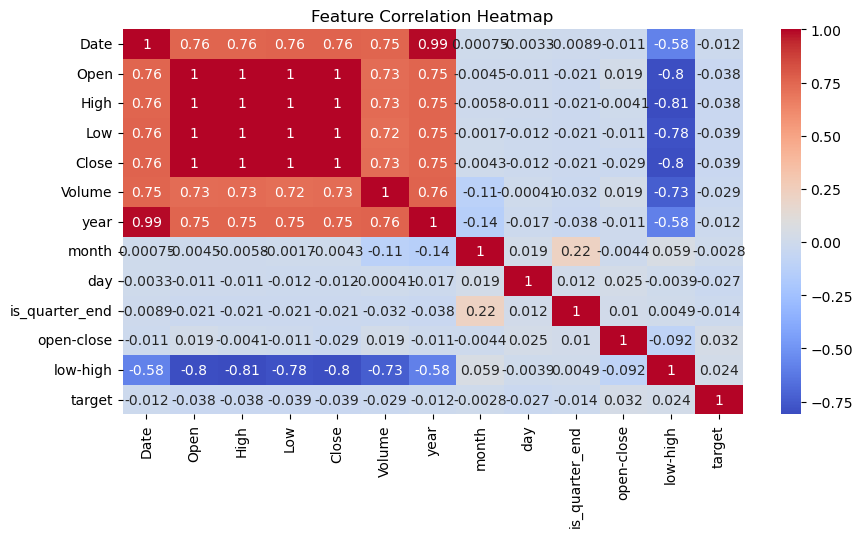

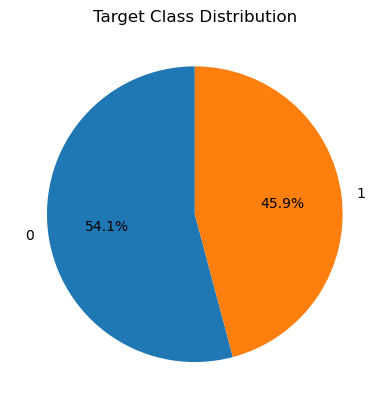

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df = pd.read_csv("C://Users//Administrator//Downloads//bitcoin.csv")
df = df.drop(['Adj Close'], axis=1)
splitted = df['Date'].str.split('-', expand=True)
df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')
df['Date'] = pd.to_datetime(df['Date'])
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0, stratify=target)
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
plt.figure(figsize=(10, 5))
sb.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

plt.pie(df['target'].value_counts(), labels=[0, 1], autopct='%1.1f%%', startangle=90)
plt.title('Target Class Distribution')
plt.show()


In [24]:
latest_data = df.iloc[-1]
latest_features = pd.DataFrame([{
    'open-close': latest_data['Open'] - latest_data['Close'],
    'low-high': latest_data['Low'] - latest_data['High'],
    'is_quarter_end': 1 if latest_data['month'] % 3 == 0 else 0
}])
prediction = model.predict(latest_features)[0]
direction = "up" if prediction == 1 else "down"
print(f"📈 The model predicts that the Bitcoin price will go {direction} tomorrow.")


📈 The model predicts that the Bitcoin price will go down tomorrow.



🔍 Classification Model Evaluation:
Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.41      0.43       373
           1       0.54      0.58      0.56       441

    accuracy                           0.50       814
   macro avg       0.49      0.49      0.49       814
weighted avg       0.50      0.50      0.50       814

Confusion Matrix:
 [[152 221]
 [186 255]]

📈 The model predicts that the Bitcoin price will go down tomorrow.

📊 Regression Model Evaluation:
Mean Squared Error: 56531942.65022642
💰 The model predicts that the Bitcoin closing price tomorrow will be around: $34659.69


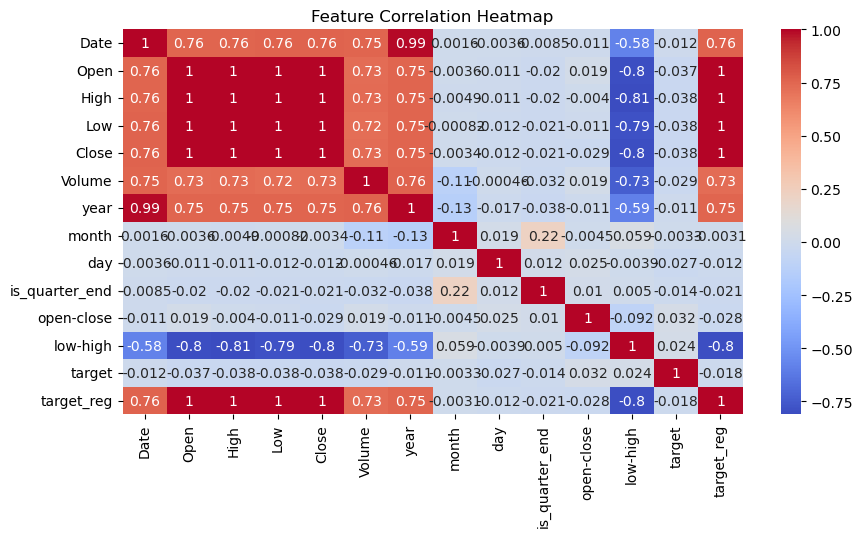

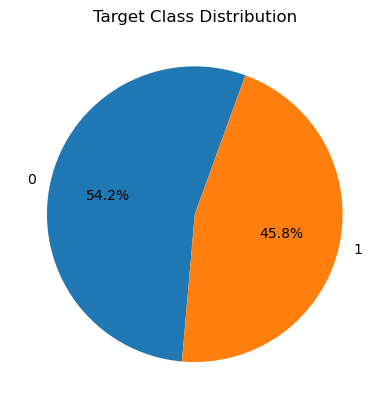

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
df = pd.read_csv("C://Users//Administrator//Downloads//bitcoin.csv")
df = df.drop(['Adj Close'], axis=1)
splitted = df['Date'].str.split('-', expand=True)
df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')
df['Date'] = pd.to_datetime(df['Date'])
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0, stratify=target)
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("\n🔍 Classification Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
latest_data = df.iloc[-1]
latest_features = pd.DataFrame([{
    'open-close': latest_data['Open'] - latest_data['Close'],
    'low-high': latest_data['Low'] - latest_data['High'],
    'is_quarter_end': 1 if latest_data['month'] % 3 == 0 else 0
}])
prediction = model.predict(latest_features)[0]
direction = "up" if prediction == 1 else "down"
print(f"\n📈 The model predicts that the Bitcoin price will go {direction} tomorrow.")
df['target_reg'] = df['Close'].shift(-1)
df = df[:-1]
X_reg = df[['open-close', 'low-high', 'is_quarter_end']]
y_reg = df['target_reg']
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.3, random_state=0)
reg_model = RandomForestRegressor(n_estimators=100, random_state=0)
reg_model.fit(X_train_r, y_train_r)
y_pred_r = reg_model.predict(X_test_r)
mse = mean_squared_error(y_test_r, y_pred_r)
print("\n📊 Regression Model Evaluation:")
print("Mean Squared Error:", mse)
latest = df.iloc[-1]
latest_features_r = pd.DataFrame([{
    'open-close': latest['Open'] - latest['Close'],
    'low-high': latest['Low'] - latest['High'],
    'is_quarter_end': 1 if latest['month'] % 3 == 0 else 0
}])
predicted_price = reg_model.predict(latest_features_r)[0]
print(f"💰 The model predicts that the Bitcoin closing price tomorrow will be around: ${predicted_price:.2f}")
plt.figure(figsize=(10, 5))
sb.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

plt.pie(df['target'].value_counts(), labels=[0, 1], autopct='%1.1f%%', startangle=70)
plt.title('Target Class Distribution')
plt.show()

In [4]:
import pandas as pd
open_price = 30000
close_price = 29500
low_price = 29000
high_price = 31000
month = 6  # Example: June

your_input = pd.DataFrame([{
    'open-close': open_price - close_price,
    'low-high': low_price - high_price,
    'is_quarter_end': 1 if month % 3 == 0 else 0
}])
direction = model.predict(your_input)[0]
predicted_price = reg_model.predict(your_input)[0]

print("Direction:", "📈 Up" if direction == 1 else "📉 Down")
print(f"Predicted Closing Price: ${predicted_price:.2f}")


Direction: 📈 Up
Predicted Closing Price: $43497.68


In [5]:
import pandas as pd
open_price = 31000
close_price = 29500
low_price = 27000
high_price = 30000
month = 7  # Example: June

your_input = pd.DataFrame([{
    'open-close': open_price - close_price,
    'low-high': low_price - high_price,
    'is_quarter_end': 1 if month % 3 == 0 else 0
}])
direction = model.predict(your_input)[0]
predicted_price = reg_model.predict(your_input)[0]

print("Direction:", "📈 Up" if direction == 1 else "📉 Down")
print(f"Predicted Closing Price: ${predicted_price:.2f}")


Direction: 📈 Up
Predicted Closing Price: $48053.91
